In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
plot_2023_df = pd.read_csv('2023_BRFSS_CLEANED.csv')

In [3]:
DIABETES_STATUS_labels = {
    0: 'Non-Diabetic',
    1: 'Pre-Diabetic or Borderline Diabetic',
    2: 'Diabetic only during pregnancy',
    3: 'Diabetic'
}

order = [0, 1, 2, 3]

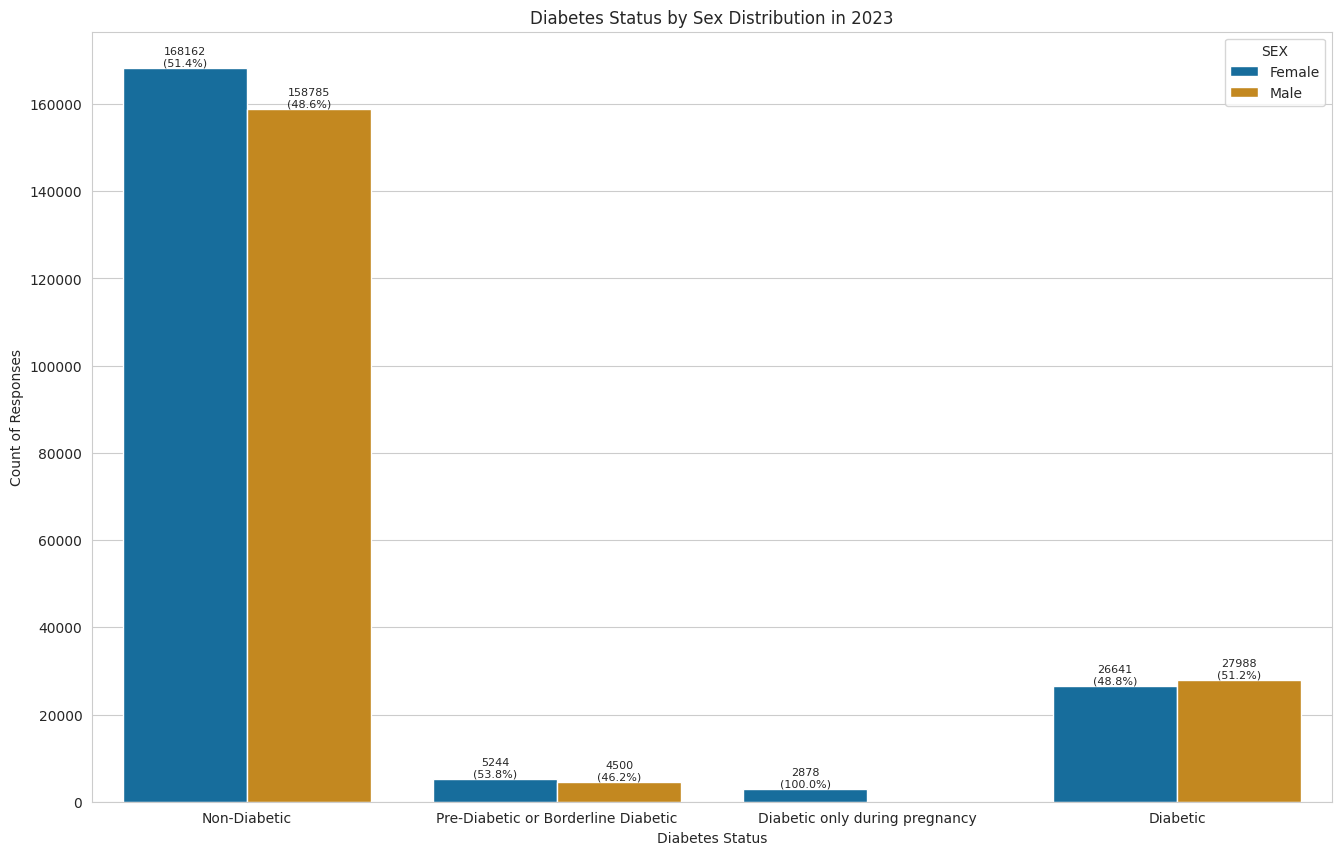

In [4]:
# Plot Diabetes Status by Sex Distribution in 2023

SEX_labels = {
    0: 'Female',
    1: 'Male'
}

plot_2023_df['SEX'] = plot_2023_df['SEX'].map(SEX_labels)

sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
ax = sns.countplot(
    data=plot_2023_df,
    x="DIABETES_STATUS",
    hue="SEX",
    order=order,
    palette="colorblind"
)

totals = plot_2023_df['DIABETES_STATUS'].value_counts().to_dict()

for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue

    x_center = p.get_x() + p.get_width() / 2
    cat_idx = int(round(x_center))
    cat_idx = max(0, min(cat_idx, len(order) - 1)) 
    cat_value = order[cat_idx]

    total = totals.get(cat_value, 0)
    pct = 0 if total == 0 else (height / total) * 100

    ax.text(
        x_center, height + 0.5,
        f'{int(height)}\n({pct:.1f}%)',
        ha='center', va='bottom', fontsize=8
    )

plt.title('Diabetes Status by Sex Distribution in 2023')
plt.xlabel('Diabetes Status')
plt.xticks(ticks=range(len(order)), labels=[DIABETES_STATUS_labels[i] for i in order])
plt.ylabel('Count of Responses')

plt.show()

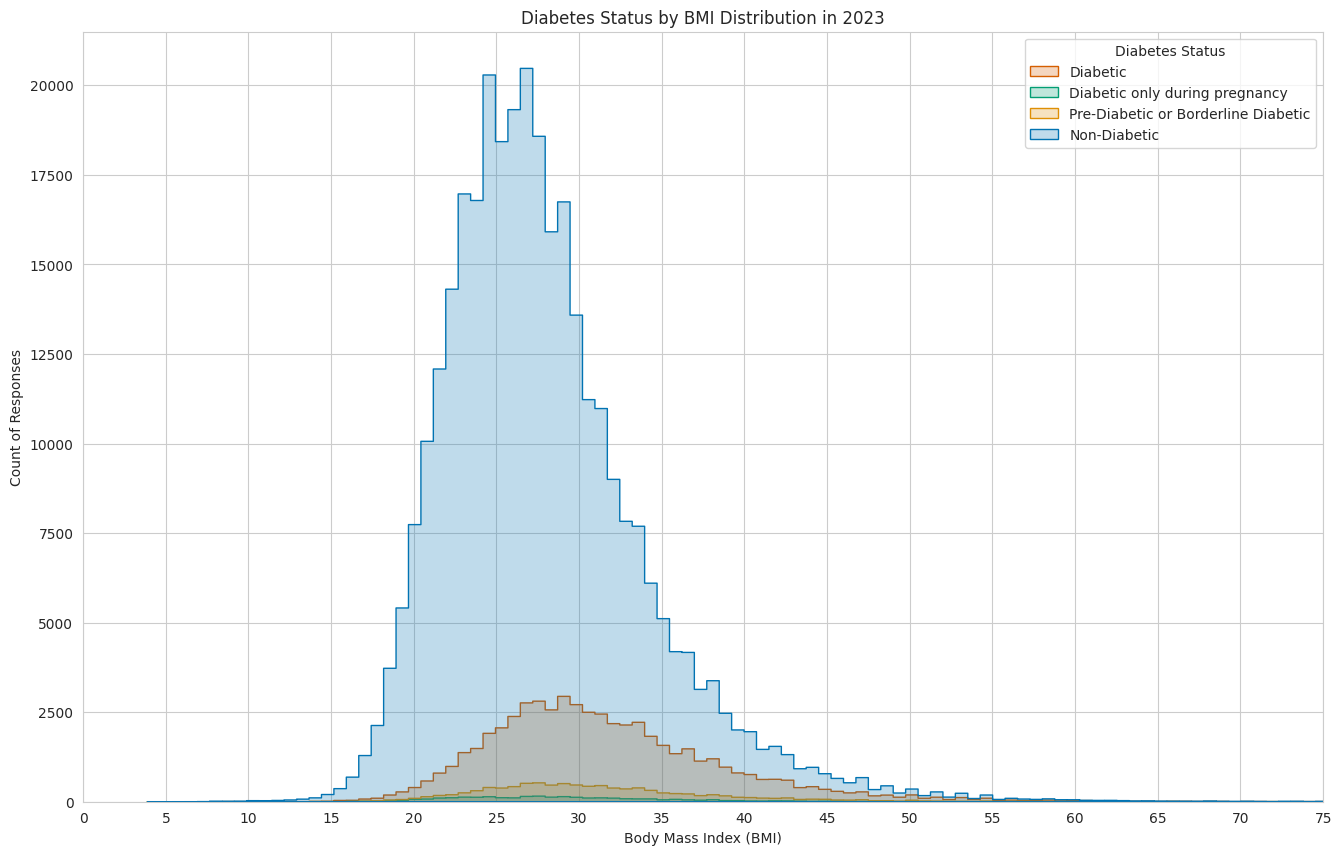

In [5]:
# Plot Diabetes Status by BMI Distribution in 2023

sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
ax = sns.histplot(
    data=plot_2023_df,
    x="BMI",
    hue="DIABETES_STATUS",
    bins=256,
    element="step",
    palette="colorblind"
)

ax.set_xlim(0, 75)

plt.title("Diabetes Status by BMI Distribution in 2023")
plt.xlabel("Body Mass Index (BMI)")
plt.xticks(ticks=range(0, 76, 5))
plt.ylabel("Count of Responses")

plt.legend(title='Diabetes Status', labels=[DIABETES_STATUS_labels[i] for i in order[::-1]])

plt.show()

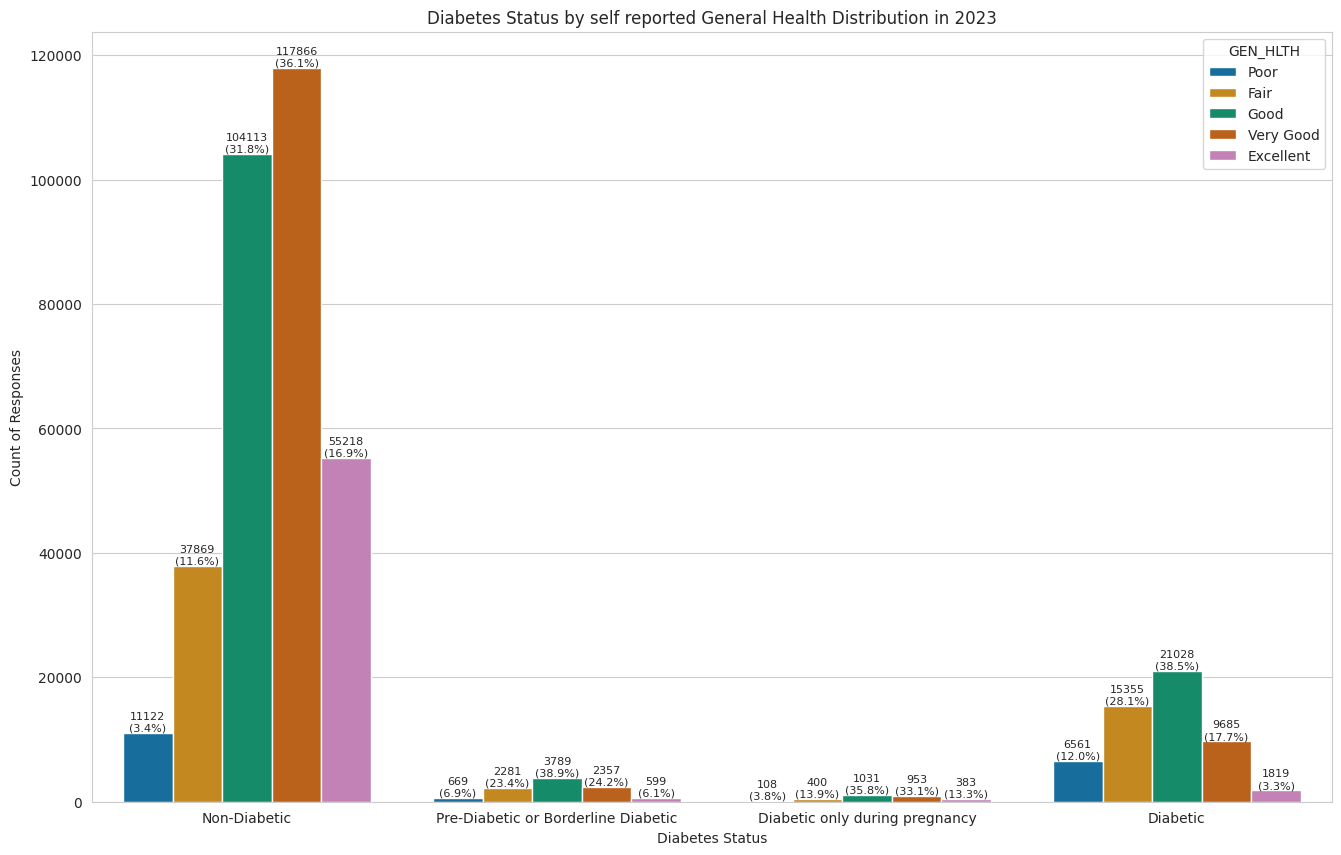

In [6]:
# Plot Diabetes Status by General Health Distribution in 2023

GEN_HLTH_labels = {
    1: 'Poor',
    2: 'Fair',
    3: 'Good',
    4: 'Very Good',
    5: 'Excellent'
}

plot_2023_df['GEN_HLTH'] = plot_2023_df['GEN_HLTH'].map(GEN_HLTH_labels)

ordered_gen_hlth = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
plot_2023_df['GEN_HLTH'] = pd.Categorical(plot_2023_df['GEN_HLTH'], categories=ordered_gen_hlth, ordered=True)

sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
ax = sns.countplot(
    data=plot_2023_df,
    x="DIABETES_STATUS",
    hue="GEN_HLTH",
    order=order,
    palette="colorblind"
)

totals = plot_2023_df['DIABETES_STATUS'].value_counts().to_dict()

for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue

    x_center = p.get_x() + p.get_width() / 2
    cat_idx = int(round(x_center))
    cat_idx = max(0, min(cat_idx, len(order) - 1)) 
    cat_value = order[cat_idx]

    total = totals.get(cat_value, 0)
    pct = 0 if total == 0 else (height / total) * 100

    ax.text(
        x_center, height + 0.5,
        f'{int(height)}\n({pct:.1f}%)',
        ha='center', va='bottom', fontsize=8
    )

plt.title('Diabetes Status by self reported General Health Distribution in 2023')
plt.xlabel('Diabetes Status')
plt.xticks(ticks=range(len(order)), labels=[DIABETES_STATUS_labels[i] for i in order])
plt.ylabel('Count of Responses')

plt.show()